<a href="https://colab.research.google.com/github/ProtimDas/Internship-Studio-Project/blob/master/Marketing_Campaign_for_Banking_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MARKETING CAMPAIGN FOR BANKING PRODUCTS**

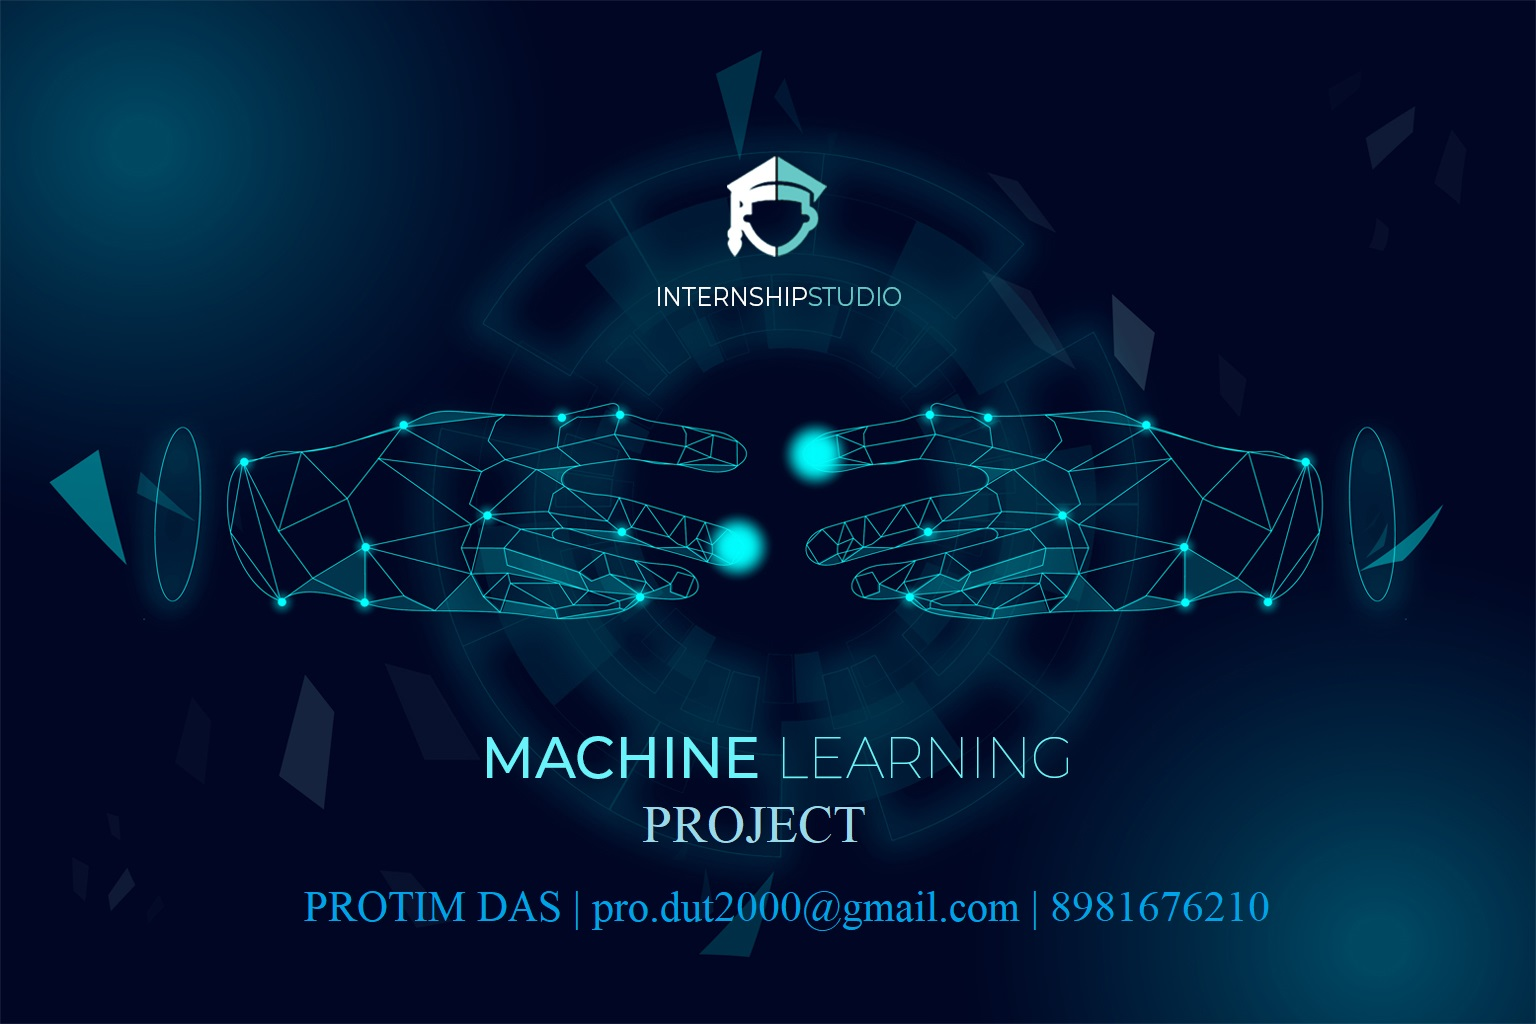



## **CONTEXT**


> The bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.







## **PROJECT OBJECTIVE**


> The classification goal is to predict the likelihood of a liability customer buying personal
loans.



## 1. Importing the required libraries for EDA.

In [ ]:
import numpy as np               #Linear Algebra
import pandas as pd              #Dataframe Handling
import matplotlib.pyplot as plt  #Data Visualization
import seaborn as sns            #Data Visualization
%matplotlib inline
import warnings                  #To ignore any warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.1 Loading the data into the DataFrame.

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')

In [ ]:
# To display the top 5 rows
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# To display the bottom 5 rows
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### 1.2 Checking the types of data and basic summery statistics

In [ ]:
# To check the column name, null-count, and datatype.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


We have 13 independent variables and 1 dependent variable i.e. ‘Personal Loan’ in the data set. Also, we got 5000 rows which can be split into test & train datasets.


> **Description of the variables**


* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: years of professional experience.
* Income: Annual income of the customer.
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Avg. spending on credit cards per month.
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any.
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* Credit card: Does the customer use a credit card issued by UniversalBank?







In [ ]:
# To calculate the shape (sample+feature) of the dataset.

print('Number of features in the data : ', data.shape[1])
print('Number of samples in the data  : ', data.shape[0])

Number of features in the data :  14
Number of samples in the data  :  5000


In [ ]:
#Checking the summation of null values column-wise.
data.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#suumary statistics
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


We now know that:                    
1) Our data has 5000 row and 14 attributes.                 
2) Our data is clean i.e. no null values present in the data.    
3) Our data is numeric in nature.    
4) Experience can not be negative but our table is showing it. So we have to clean this attribute.

## 2. Cleaning of data and Dropping of irrelevant columns

Let's check the correlation between the age and experience column.

In [ ]:
exp = data['Experience']
age = data['Age']
correlation = exp.corr(age) #To find coorelation.
correlation

0.9942148569683321



> We can see that, these columns are highly correlated. 
Hence,we will drop our experience column.


> The id of a person will not help our model to reach a conclusion. So we will drop id column.


> The ZIP Code is just a series of numbers. So, we will drop ZIP Code also.







In [ ]:
data = data.drop(['ID','Experience','ZIP Code'], axis=1) 
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


## 3. Exploratory Data Analysis


> Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we understand the problem better and try to uncover hidden insights.

In Our Dataset There are:

> It got 2 categorical variables: ‘Education’, ‘Family’

> It got 5 Boolean+categorical variables: ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’

> 7 numeric variables: ‘Age’, ‘CC_Avg’, ‘ID’, ‘Income’, ‘Mortgage’, ‘Zip_Code’, ‘Experience’




#### 3.1 Let's find out the number of unique in each column.

In [ ]:
unique = data.nunique() # To find unique element column-wise.
unique

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

#### 3.2 Number of people with zero mortgage.

In [ ]:
zero_mortgage = (data.Mortgage==0).sum()
print("There are {} number of people with zero mortgage".format(zero_mortgage))

There are 3462 number of people with zero mortgage


#### 3.3 Number of people with zero credit card spending per month.

In [ ]:
zero_CCAvg = (data.CCAvg==0).sum()
print("There are {} number of people with zero CCAvg".format(zero_CCAvg))

There are 106 number of people with zero CCAvg


#### 3.3 Value Counts of all categorical columns.

In [ ]:
l = ['Family', 'Education', 'Personal Loan',
     'Securities Account', 'CD Account',
     'Online', 'CreditCard']
for col in l:
    print(col)
    print(data[col].value_counts())
    print("**"*20)


Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
****************************************
Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
****************************************
Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64
****************************************
Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64
****************************************
CD Account
0    4698
1     302
Name: CD Account, dtype: int64
****************************************
Online
1    2984
0    2016
Name: Online, dtype: int64
****************************************
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
****************************************


#### 3.4 UNIVARIATE ANALYSIS

![alt text](https://www.bookmyessay.com/wp-content/uploads/2018/10/Skewness-and-Kurtosis.png)

Skewness: -0.029341
Kurtosis: -1.153067


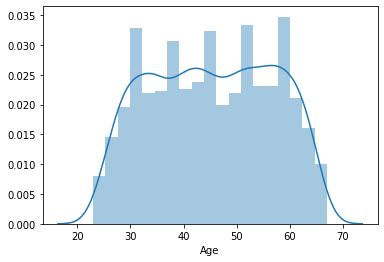

In [ ]:
sns.distplot(data.Age);
print("Skewness: %f" % data['Age'].skew())
print("Kurtosis: %f" % data['Age'].kurt())




> Age seems to have symmetric distribution.



Skewness: 0.841339
Kurtosis: -0.044244


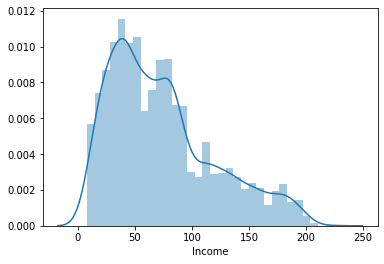

In [ ]:
sns.distplot(data.Income);
print("Skewness: %f" % data['Income'].skew())
print("Kurtosis: %f" % data['Income'].kurt())



> Income is right-skewed distribution.



Skewness: 1.598457
Kurtosis: 2.646691


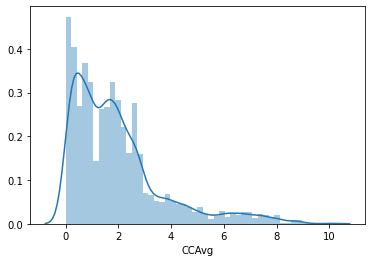

In [ ]:
sns.distplot(data.CCAvg);
print("Skewness: %f" % data['CCAvg'].skew())
print("Kurtosis: %f" % data['CCAvg'].kurt())



> CCAvg is right-skewed distribution.



Skewness: 2.104002
Kurtosis: 4.756797


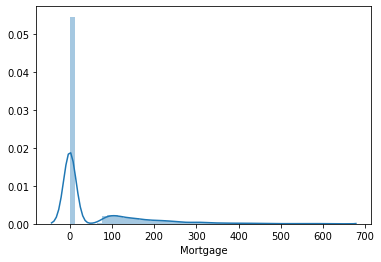

In [ ]:
sns.distplot(data.Mortgage);
print("Skewness: %f" % data['Mortgage'].skew())
print("Kurtosis: %f" % data['Mortgage'].kurt())



> Mortgage is discontinuous distribution.



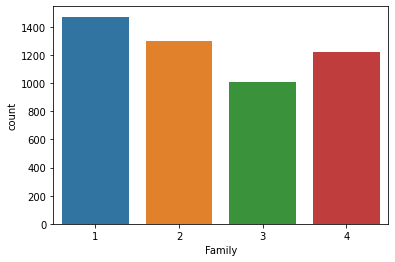

In [ ]:
sns.countplot(data.Family);
#Around 29% of the customer’s family size is 1

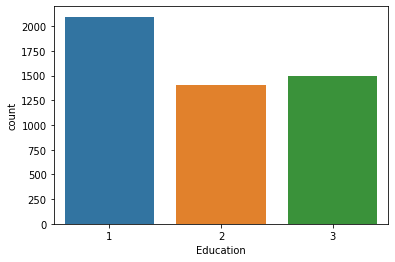

In [ ]:
sns.countplot(data.Education)

#42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate

#### 3.5 BIVARIATE ANALYSIS

**let's check the influence of the income and education on personal loan.**

> **Hypothesis:** high salaries are less feasible to buy personal loans while customers with medium or low salaries are more feasible for buying personal loans.  

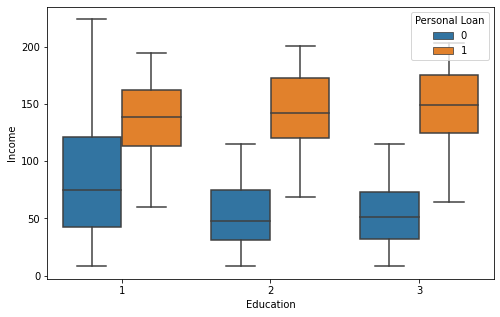

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)
plt.legend(loc='upper right',title='Personal Loan')






> **Observation:**It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels





**let's check the influence of the income and family on personal loan.**



> **Hypothesis:**More the number of earning family members, less probability of buying personal loans



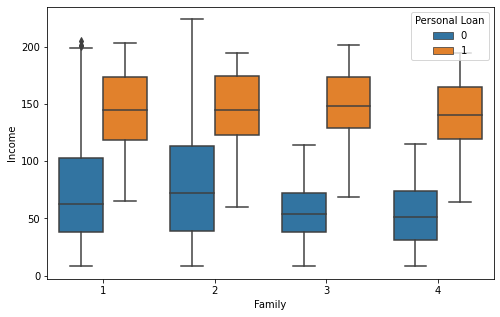

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=data)
plt.legend(loc='upper right',title='Personal Loan')



> **Observation:** The number of family members not significantly affect probability. Hence it contradicts our hypothesis that the number of family members will affect the probability.



**let's check the influence of the income and family on personal loan.**



> **Hypothesis:**The customer is a graduate or under-graduate can affect the buying probability, people who are graduated or Advanced Professionals are more viable to buy personal loans from a bank rather than people who are under-graduated.



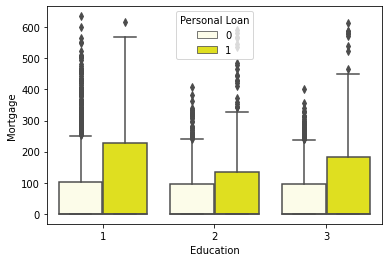

In [ ]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data,color='yellow')



> **Observation**:From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage



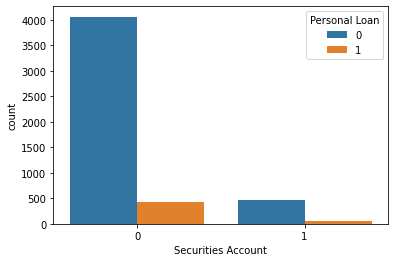

In [ ]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")



> **Observation**:Majority of customers who does not have loan have securities account.



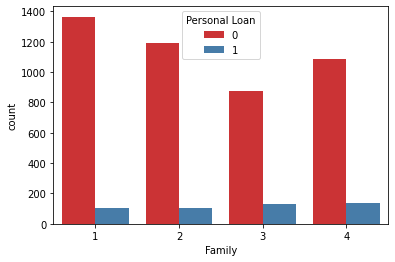

In [ ]:
sns.countplot(x='Family',data=data,hue='Personal Loan',palette='Set1')



> **Observation:** Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.



In [ ]:
source_counts =pd.DataFrame(data["Personal Loan"].value_counts()).reset_index()
source_counts.columns =["Labels","Personal Loan"]
source_counts

,Labels,Personal Loan
0,0,4520
1,1,480


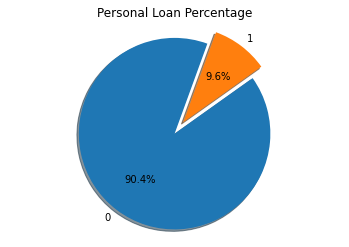

In [ ]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(source_counts["Personal Loan"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Personal Loan Percentage")
plt.show()

#pie chart representation of personal loan.

**let's analyze the distribution of CCAvg with Personal Loan.**

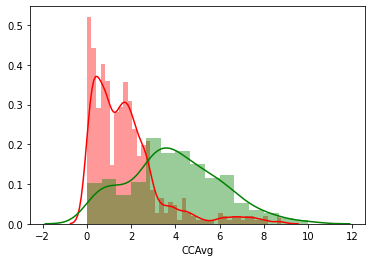

In [ ]:
sns.distplot( data[data['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( data[data['Personal Loan']== 1]['CCAvg'], color = 'g')

In [ ]:
print('Credit card spending of Non-Loan customers: ',data[data['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', data[data['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0




> **Observation:** The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.



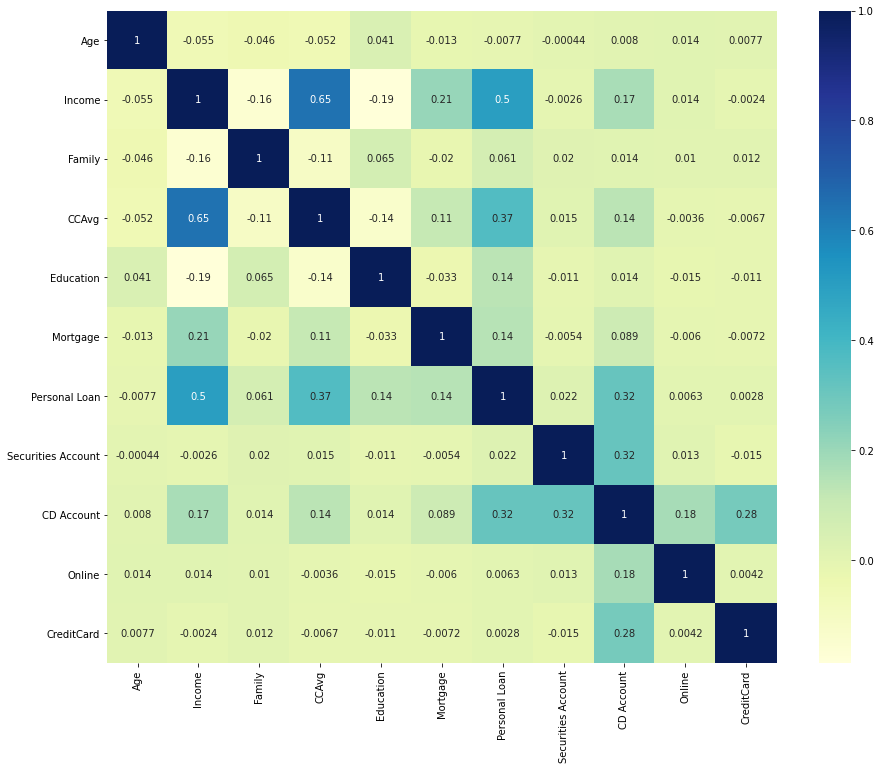

In [ ]:
#Correlation Representation
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), cmap="YlGnBu",annot=True)

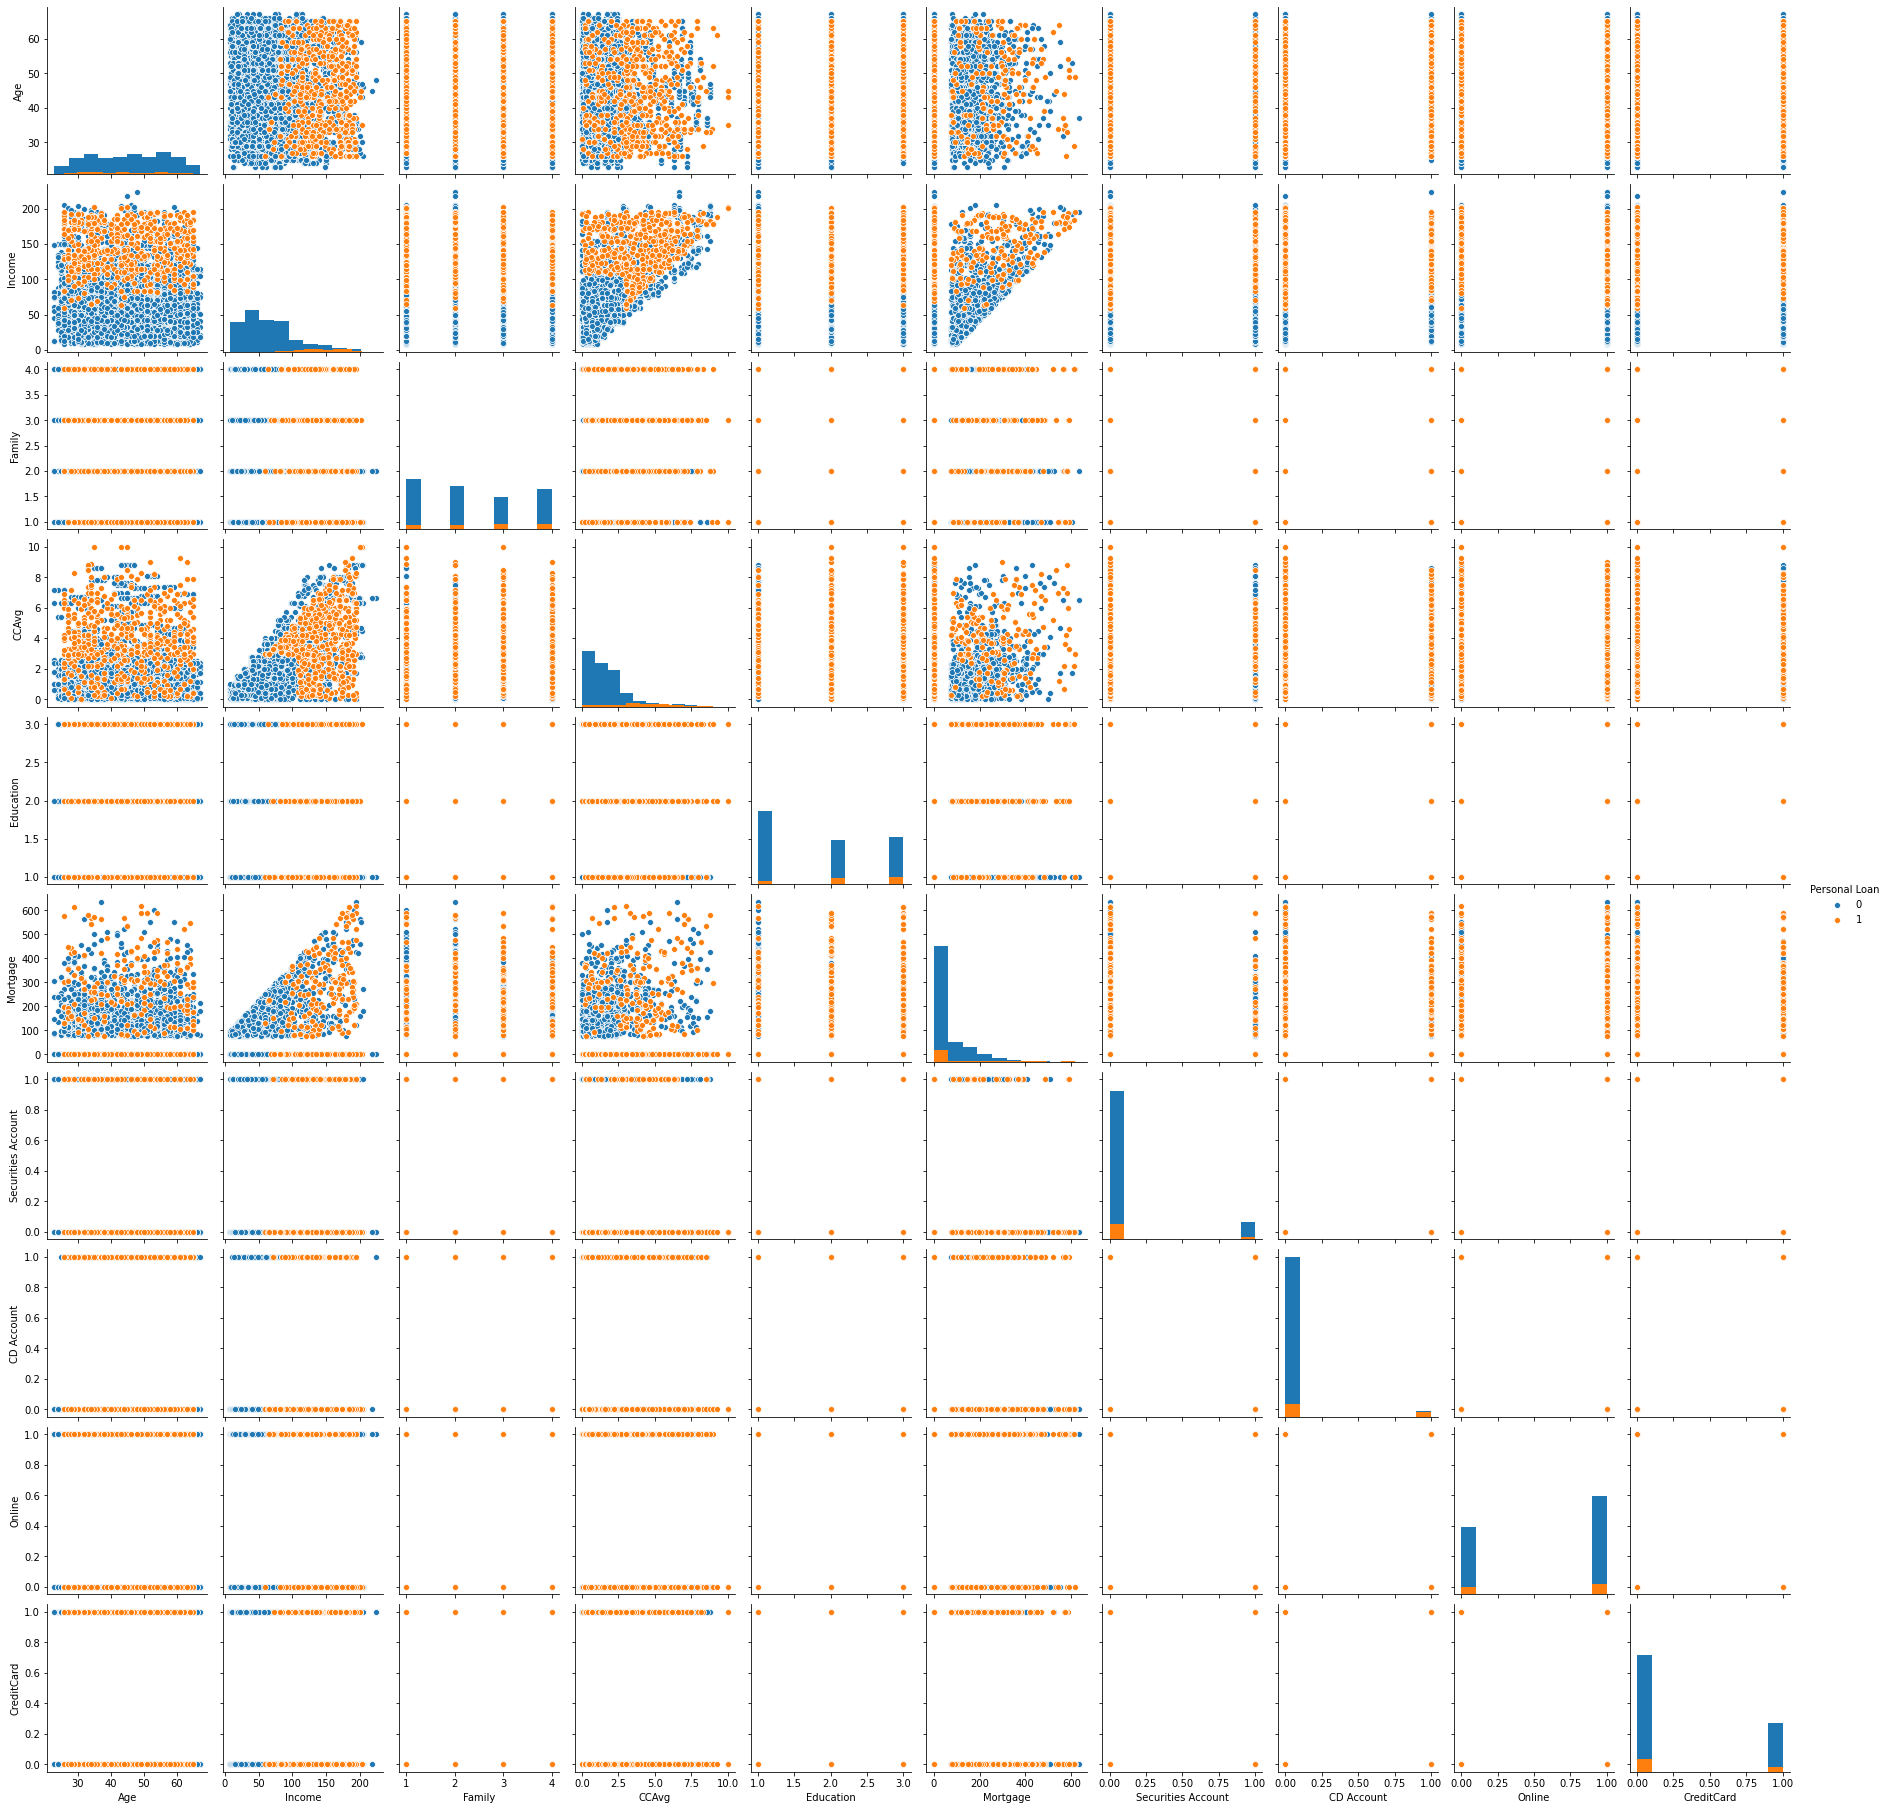

In [ ]:
sns.pairplot(data,hue='Personal Loan',diag_kind='hist')

## 4. Transformation and Outlier Treatment


> We have found out that we have income and ccavg value skewed so we have to transform them.


> As we saw earlier in univariate analysis, Mortgage contains outliers, so we must treat them as the presence of outliers affects the distribution of the data.





#### 4.1 Data Transformation

So lets use x featurs for our model and personal loan as y feature.

In [ ]:
data_X = data.loc[:, data.columns != 'Personal Loan']
data_Y = data[['Personal Loan']]

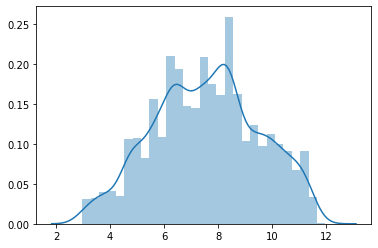

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X['Income'].values.reshape(-1,1))
temp = pt.transform(data_X['Income'].values.reshape(-1,1))
sns.distplot(temp);

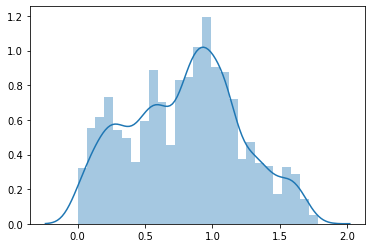

In [ ]:
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X['CCAvg'].values.reshape(-1,1))
temp = pt.transform(data_X['CCAvg'].values.reshape(-1,1))
sns.distplot(temp);

Now, CCAvg and Income are transformed. But now we have to transform the mortgage column. We have found that many values are 0 and other are only few.

#### 4.2 Outlier Treatment

Having outliers often has a significant effect on the mean and standard deviation and, hence affecting the distribution. We must take steps to remove outliers from our data sets.

![alt text](http://lrieber.coe.uga.edu/edit6900/resources/z_formula_large.gif?crop)

In [ ]:
from scipy import stats 

data['Mortgage zscore'] = np.abs(stats.zscore(data['Mortgage']))
data = data[data['Mortgage zscore']<3]
data.drop('Mortgage zscore',axis=1, inplace=True)

In [ ]:
data.shape

(4895, 11)

Here I had chosen those rows only whose z_score is less than 3, it can vary accordingly. Here we had dropped more than 100+ rows which contain outliers and now we can start with the model building.

## 5. Normalizing and Splitting my Dataframe into Train and Test Dataset.



In [ ]:
#First we define our independent variable and target variable as X and y.

X= data.drop('Personal Loan',axis=1)
y= data[['Personal Loan']]

In [ ]:
# Import the library required for splitting the dataset.

from sklearn.model_selection import train_test_split

In [ ]:
# Split into Train and test datset with a ratio of 70:30

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
#Normalizing step using standard-scalar

from sklearn import preprocessing
col_names = data.columns
scaler = preprocessing.StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)  #Scaled values for train dataset.
scaled_X_test=scaler.fit_transform(X_test)    #Scaled values for test dataset.

Here, we define a advance function that helps us to represent confusion matrix in a better way.

In [ ]:
#Import confusion_matrix module.
from sklearn.metrics import confusion_matrix
# Define and describe the function.
def draw_cm (actual,predicted):
  cm = confusion_matrix(actual,predicted)
  sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
  plt.ylabel('Observed')
  plt.xlabel('Predicted')
  plt.show()

## 6. Logistic Regression Model


> Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.







In [ ]:
#Import our model library and deffine an instance to utilize the library functions.

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
#Due to splitting, there is vacancy in our train dataset.
#First, we need to fit our train dataset.

logreg.fit(scaled_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# In this step, we predict our target variable on the basis of test dataset of independent variables
y_pred = logreg.predict(scaled_X_test)

Now, we have to import the different functions to analyze our building model is perfect or not.

This all are under sklearn.metrics.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.05105513955071477
R2 Score: 0.4261120950098968
Accuracy Score: 0.9489448604492853


In [ ]:
print("Accuracy score for train data",accuracy_score(y_train,logreg.predict(scaled_X_train)))

Accuracy score for train data 0.9582603619381203


Confusion Matrix


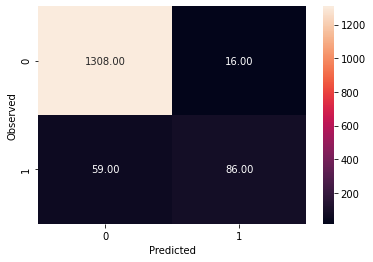

None


In [ ]:
print("Confusion Matrix")
print(draw_cm(y_test,y_pred))

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1324
           1       0.84      0.59      0.70       145

    accuracy                           0.95      1469
   macro avg       0.90      0.79      0.83      1469
weighted avg       0.95      0.95      0.94      1469



In [ ]:
from sklearn.metrics import roc_curve,auc

In [ ]:
logreg_prob = logreg.predict_proba(scaled_X_test)
fpr1, tpr1, thresholds1 = roc_curve(y_test, logreg_prob[:,1])
roc_auc1=auc(fpr1,tpr1)
print("Area under the ROC curve: %f"%roc_auc1)

Area under the ROC curve: 0.961626




---



> And here we are with a classification report. Well, first have a look at the accuracy, 94.8% accuracy is not a small thing, but we know from the data that the number of buyer’s percentage to the non-buyer percentage is very less. Hence accuracy didn’t play a big role in determining how our model performed.



> We will also compare the area under roc curve to determine how our model performs. In this case, the area comes out to be around 96% which is good.



---



Now, let's try different machine learning model.

## 7. Gaussian-Naive-Bayes Model


> Bayes theorem uses the conditional probability of an event. Events should be mutually exclusive like throwing a dice. Bayesian probability relates to the degree of belief. It gives the likelihood of an event to occur. It does this with prior knowledge of the condition related to the event



In [ ]:
from sklearn.naive_bayes import GaussianNB
naiv = GaussianNB()
naiv.fit(scaled_X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred=naiv.predict(scaled_X_test)

In [ ]:
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.1102791014295439
R2 Score: -0.23959787477862293
Accuracy Score: 0.8897208985704561


In [ ]:
print("Accuracy score for train data",accuracy_score(y_train,naiv.predict(scaled_X_train)))

Accuracy score for train data 0.8940455341506129


Confusion Matrix


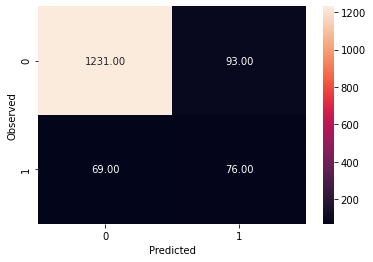

None


In [ ]:
print("Confusion Matrix")
print(draw_cm(y_test,y_pred))

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1324
           1       0.45      0.52      0.48       145

    accuracy                           0.89      1469
   macro avg       0.70      0.73      0.71      1469
weighted avg       0.90      0.89      0.89      1469



In [ ]:
naiv_prob = naiv.predict_proba(scaled_X_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, naiv_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under the ROC curve: %f"%roc_auc2)

Area under the ROC curve: 0.927795




---

We got an accuracy score of around 89% with a recall value of 52% which is much less as compared to the Logistic Regression.
Also, the area under the curve is around 92.7%, less than the logistic regression one.
Hence Naive Bayes terms out to be not a good classifier with this particular dataset.



---





## 8. KNN MODEL
KNN is a supervised algorithm, it is non-parametric and lazy (instance-based).
Because it does not explicitly learn the model, but it saves all the training data and uses the whole training set for classification or prediction. This contrasts with other techniques like SVM, where you can discard all non-support vectors without any problem.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(scaled_X_test)

In [ ]:
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.04288631722260041
R2 Score: 0.5179341598083134
Accuracy Score: 0.9571136827773996


In [ ]:
print("Accuracy score for train data",accuracy_score(y_train,knn.predict(scaled_X_train)))

Accuracy score for train data 0.9769410391126678


Confusion Matrix


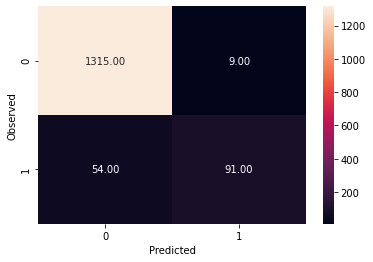

None


In [ ]:
print("Confusion Matrix")
print(draw_cm(y_test,y_pred))

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1324
           1       0.91      0.63      0.74       145

    accuracy                           0.96      1469
   macro avg       0.94      0.81      0.86      1469
weighted avg       0.96      0.96      0.95      1469



In [ ]:
knn_prob = knn.predict_proba(scaled_X_test)
fpr3, tpr3, thresholds3 = roc_curve(y_test, knn_prob[:,1])
roc_auc3=auc(fpr3,tpr3)
print("Area under the ROC curve: %f"%roc_auc3)

Area under the ROC curve: 0.881865




---
And here we are with around 95.7% accuracy in determining if a customer will buy the personal loan or not. Also, the recall value is 63% is much better than logistic regression and Naive Bayes algorithms. Also, the area under the curve is fairly good.


---




## 9. Support Vector Machine

 Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two-dimensional space, this hyperplane is a line dividing a plane into two parts wherein each class lay on either side.

In [ ]:
from sklearn import svm

clf = svm.SVC(probability=True)
clf.fit(scaled_X_train,y_train)
y_pred=clf.predict(scaled_X_test)


In [ ]:
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.037440435670524165
R2 Score: 0.5791488696739243
Accuracy Score: 0.9625595643294759


In [ ]:
print("Accuracy score for train data",accuracy_score(y_train,clf.predict(scaled_X_train)))

Accuracy score for train data 0.9807355516637478


Confusion Matrix


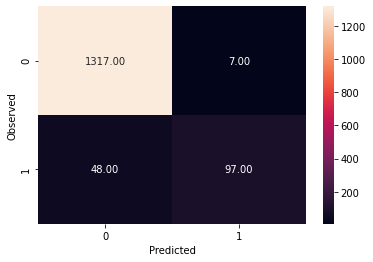

None


In [ ]:
print("Confusion Matrix")
print(draw_cm(y_test,y_pred))

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1324
           1       0.93      0.67      0.78       145

    accuracy                           0.96      1469
   macro avg       0.95      0.83      0.88      1469
weighted avg       0.96      0.96      0.96      1469



In [ ]:
svm_prob = clf.predict_proba(scaled_X_test)
fpr4, tpr4, thresholds4 = roc_curve(y_test, svm_prob[:,1])
roc_auc4=auc(fpr4,tpr4)
print("Area under the ROC curve: %f"%roc_auc4)

Area under the ROC curve: 0.983071




---
We got 97% accuracy score with 67% recall value, also the area under the curve is about 98%.
SVM can be deployed to predict the likelihood of a liability customer buying personal loans but we will look further if trees can predict better or not.


---




## 10. Decision Tree Classifier

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=8,random_state=0)
dtc = dtc.fit(scaled_X_train,y_train)

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dtc, out_file=None,feature_names=['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account'],filled=True, rounded=True) 
graph = graphviz.Source(dot_data)

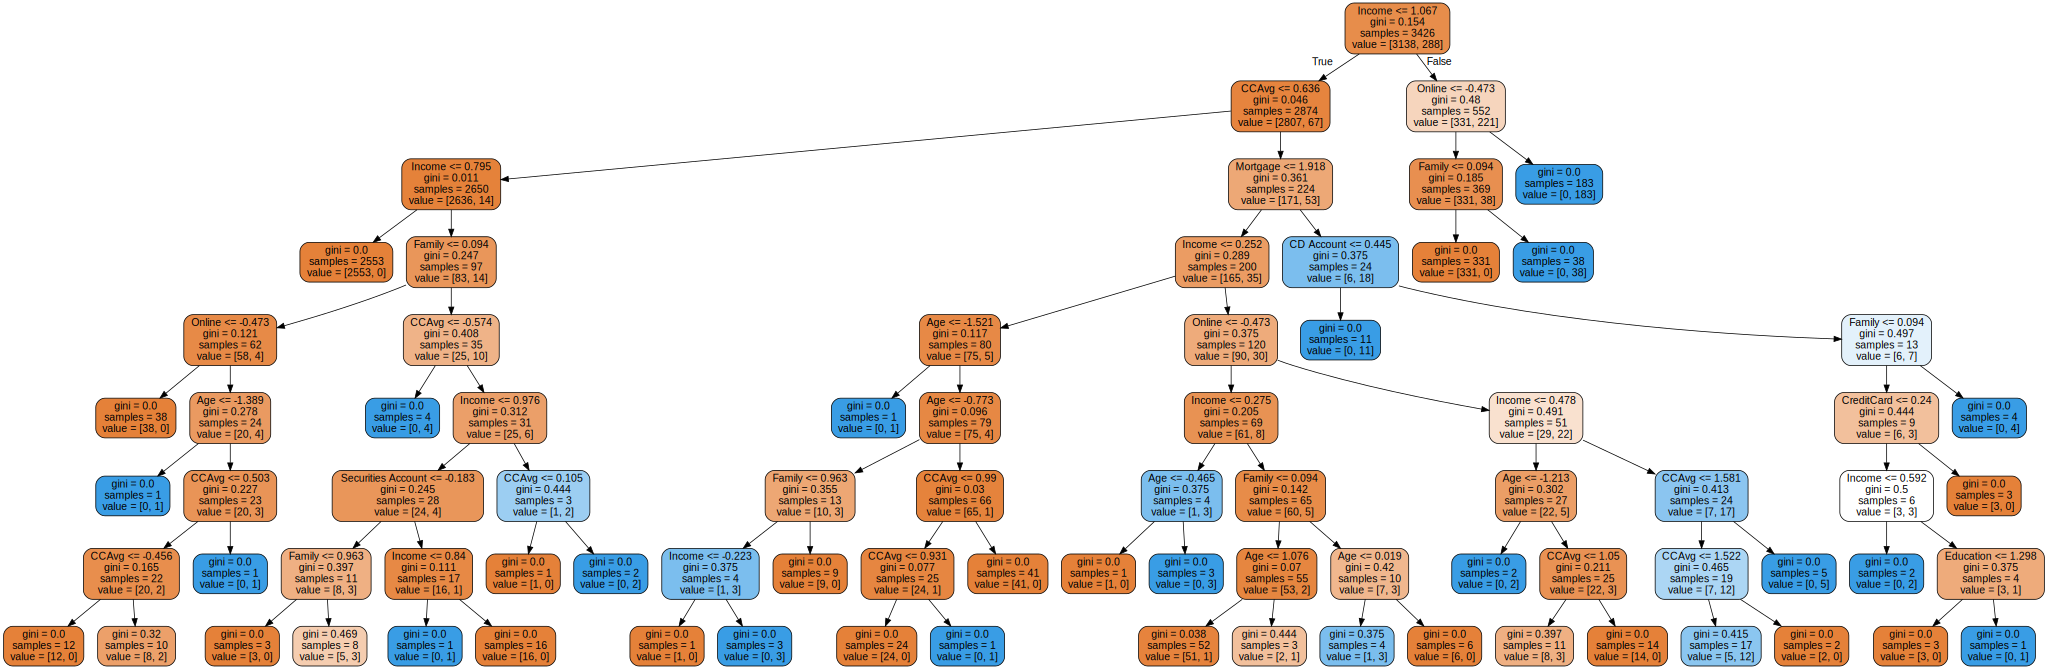

In [ ]:
graph

In [ ]:
y_pred = dtc.predict(scaled_X_test)

In [ ]:
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.02654867256637168
R2 Score: 0.7015782894051463
Accuracy Score: 0.9734513274336283


In [ ]:
print("Accuracy score for train data",accuracy_score(y_train,dtc.predict(scaled_X_train)))

Accuracy score for train data 0.9953298307063632


Confusion Matrix


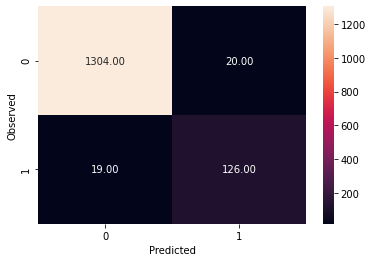

None


In [ ]:
print("Confusion Matrix")
print(draw_cm(y_test,y_pred))

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1324
           1       0.86      0.87      0.87       145

    accuracy                           0.97      1469
   macro avg       0.92      0.93      0.93      1469
weighted avg       0.97      0.97      0.97      1469



In [ ]:
dtc_prob = dtc.predict_proba(scaled_X_test)
fpr5, tpr5, thresholds5 = roc_curve(y_test, dtc_prob[:,1])
roc_auc5=auc(fpr5,tpr5)
print("Area under the ROC curve: %f"%roc_auc5)

Area under the ROC curve: 0.944484




---
It is working very much better than other two algo. It is showing 97% accuracy score. Apart from this, we can even find that the false negative and false positive are also very less as compared to above to models.


---




## 11. Random Forest Classifier

Random forest is an extension of bagged decision trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=500,max_depth=8,random_state=0)
rfc.fit(scaled_X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred=rfc.predict(scaled_X_test)

In [ ]:
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.017699115044247787
R2 Score: 0.8010521929367642
Accuracy Score: 0.9823008849557522


In [ ]:
print("Accuracy score for train data",accuracy_score(y_train,rfc.predict(scaled_X_train)))

Accuracy score for train data 0.9935785172212492


Confusion Matrix


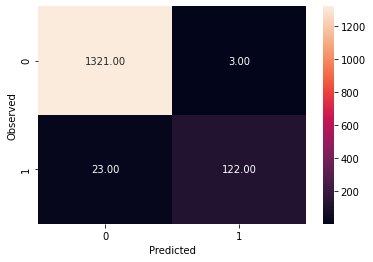

None


In [ ]:
print("Confusion Matrix")
print(draw_cm(y_test,y_pred))

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1324
           1       0.98      0.84      0.90       145

    accuracy                           0.98      1469
   macro avg       0.98      0.92      0.95      1469
weighted avg       0.98      0.98      0.98      1469



In [ ]:
rfc_prob = rfc.predict_proba(scaled_X_test)
fpr6, tpr6, thresholds6 = roc_curve(y_test, rfc_prob[:,1])
roc_auc6=auc(fpr6,tpr6)
print("Area under the ROC curve: %f"%roc_auc6)

Area under the ROC curve: 0.996489




---
We got 98% accuracy with 84% recall value and an astonishing 99.6% area under the curve. Also, oob score counts to around 99%.


---




## 12. CONCLUSION



The overall understanding of our dataset is:   

> 1. We have to make the model to predict whether a person will take personal loan 
or not.                
2. We found that age and experience are highly correlated so we droped the experience column.                  
3. ID and ZIPcode were not contributing factors for a person to take loan so we dropped them.            
4. The Income and CCAvg column were left skewed so we applied Power transformation to them to normalize them.              
5. The mortgage column was also skewed but since it was discrete so rather than power transformation, we use binning technique.



After this, We use Machine Learning model to make predictions:

| Model Name              | Mean Absolute Error     |  Accuracy Score   |    Prescision | Recall | F1-Score
|--------------------------|---------------------------------|---------------------------------|---------------------------------|---------------------------------|---------------------------------|
| ||Test Score  --- Train Score|||
| Logistic regression          |  0.051 | 0.9498 --- 0.9582|0.84|0.59|0.7
| Gaussian Naive Bayes`  | 0.11| 0.8897 ----0.8940|0.45|0.52|0.48
| KNN | 0.042|0.9571----0.9769|0.91|0.63|0.74                 |
| Support Vector Machine     | 0.037|0.9625----0.9807|0.93|0.67|0.78           |
| Decision Tree Classifier     | 0.026|0.9734----0.9953|0.86|0.87|0.87|
| Random Forest Classifier                | 0.017|0.9823----0.9935|0.98|0.84|0.9        |


Hence, We Conclude that: **Decision Tree Classifier as well as Random forest classifer both gives satisfactory result.**